# **Capitulo 1 - JENNIFER PAOLA LOAIZA RADA GRUPO 1**

<p> Ejericico <p>

<p> Instalar la herramienta Python en los equipos, y partiendo de la base de datos transaccional general análisis descriptivo con análisis de percentiles, promedio, medidas de dispersión, y análisis de probabilidades, entre otros indicadores que generen un conocimiento más profundo de los datos<p>


<p> Se importa la libreía necesaria y se carga la base de datos para comenzar con el análisis descriptivo de los datos <p>

In [110]:
# Importación de la libería necesaria para el análsis descriptivo
from matplotlib.ticker import FuncFormatter
import numpy as np 
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from tabulate import tabulate

In [111]:
# Importación de la base de datos CottonPLus Inc

def data_import(url):
    """ 
     Descripción:
            - Esta función lee la base de datos  
    
        inputs:
            - url: string -------> Esta es el string que lee la dirección donde se ubica la base de datos
        ouputs:
            - data: float ----> esta variable importa la base de datos                         
    """
    data = pd.read_excel(url, na_values=['', 'NA', 'N/A', 'NaN', 'null']) # Importación de la base de datos
    return data

data = data_import('./data_cotton_plus.xlsx') #Aplicación de la función
data.head(5) # Muestra los primero cinco datos de la base de datos

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,NaN,NaN,0,0,0,0,0,0,0,0


<p> Se realiza la importación de los datos ofrecidos. Esta base de datos ofrece una 40 variables de 9.976 clientes aproximadamente, en las que ofrece desde los datos personales hasta la información de las compras de productos. Y Se elimna las variables que contengan información personal. <p> 


In [112]:
#Elimiar columnas que no son neccesarias para el análisis descriptivo

data = data.drop(columns= ['Nombre Completo','Mail', 'Direccion', 'Cedula', 'Direccion Valido?', 'Mail Valido?', \
                        'TelefonoOficina', 'Telefono Movil', 'Tel Casa Valido?', 'Cel Valido?', 'Tel Ofc Valid?', \
                        'Telefono Casa', 'Tipo de Contacto', 'Mes Nacimiento', 'Dia Nacimiento', 'Fecha Nacimiento' ])

In [113]:
print('*' * 150)

print(f'1. El número de columnas: {len(data.columns)}') # Número de columnas

print(f'2. El número de clientes: {len(data)}') # Número de filas

print('*' * 150)

print(f'3. Estas son las columnas de la base de datos: {data.dtypes}') # Tipo de datos en cada columna

******************************************************************************************************************************************************
1. El número de columnas: 24
2. El número de clientes: 9976
******************************************************************************************************************************************************
3. Estas son las columnas de la base de datos: Segmento                                                            object
Compro 2019?                                                        object
Compro 2020?                                                        object
Monto Comprado 2019?                                                 int64
Nro Transacciones 2019                                               int64
Monto Comprado 2020                                                  int64
Nro Transacciones 2020                                               int64
Es Contactable                                                    

<p> Para el análisis de las estádisticas descriptivas de dividirá los datos en cuantitativos y cualitativos <p> 

In [114]:
# División de la data entre string y float
data_cuantitativos = data[['Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020', 'Nro Transacciones 2020', \
                            'Edad', 'Monto Total de ultima compra', 'Cantidad Articulos', 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)', \
                             'Frecuencia (Cantidad items comprados)', 'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', \
                            'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira', \
                            'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza']]

data_cualitativos = data[['Es Contactable', 'Ciudad de Residencia', 'Genero', 'Estado Civil', 'Segmento', 'Compro 2019?', 'Compro 2020?']]

## Estadísticas descriptivas de las variables float

<p> En la base de datos se encuentran un total de 17 variables a partir de las cuales es posible calcular medidas centrales y medidas de dispersión. Sin embargo, la mayoría de las de estas variables se identifican datos atípicos al comparar la media y la mediana. La mediana muestra un valor significativamente inferior a la media, lo que sugiere la presencia de valores atípicos que afectan la precisión de la media. Además, la desviación estándar es considerablemente mayor que la media, lo que indica una alta dispersión de estos datos con respecto a la media.

<p> En resumen, se observan valores atípicos en ciertas variables que distorsionan la medida central (media) y señalan una importante dispersión con respecto a la media, lo que sugiere la necesidad de un análisis más detallado de estos datos. <p>

In [115]:
summary = data_cuantitativos.describe()
tabla_descriptiva = tabulate(summary, headers='keys', tablefmt='pretty')
print(tabla_descriptiva)

+-------+----------------------+------------------------+---------------------+------------------------+--------------------+------------------------------+--------------------+------------------------------------------------------------------+---------------------------------------+---------------------------------+----------------------------+-----------------------------------+---------------------------------+-------------------------------+---------------------------------+-----------------------------+-----------------------------------+
|       | Monto Comprado 2019? | Nro Transacciones 2019 | Monto Comprado 2020 | Nro Transacciones 2020 |        Edad        | Monto Total de ultima compra | Cantidad Articulos | Recencia (Tiempo transcurrido en semanas desde su ultima compra) | Frecuencia (Cantidad items comprados) | Monto - MARCA COTTON- B/quilla. | Monto - Brand Store Cucuta | Monto - MARCA COTTON- Bucaramanga | Monto - MARCA COTTON- Manizales | Monto - MARCA COTTON- Pereira | 

## Sexo y edad

<p> Una de las características principales de nuestros clientes es que la mayoría se encuentra en el rango de edades entre 20 y 40 años, y el 60% de ellos son mujeres. Sin embargo, es interesante destacar que también contamos con una notable presencia de más de mil personas que tienen edades de hasta 111 años. Este hecho plantea un tema intrigante para investigar: cómo se comportan estos diferentes grupos de clientes en el momento de realizar sus compras. <p>

Text(0, 0.5, 'Frecuencia')

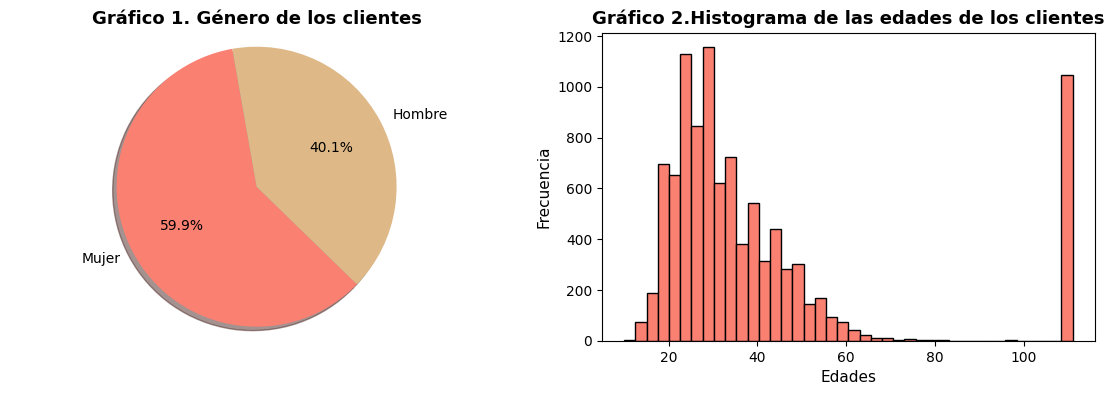

In [116]:
plt.figure(figsize=(14, 4))

#Gráfico de torta del género de los clientes  
plt.subplot(1, 2, 1)

genero = data['Genero'].value_counts().index
genero_label = data['Genero'].value_counts().values

plt.pie(genero_label, labels=genero, colors=['salmon', '#DEB887'], shadow=True, startangle=100, autopct='%1.1f%%')

plt.title("Gráfico 1. Género de los clientes", fontsize=13, fontweight='bold')
plt.axis('equal') 

#Histogrma de las edades de los clientes 
plt.subplot(1, 2, 2)

edad = data['Edad']

plt.hist(edad, bins=40, color='salmon', edgecolor='black')

plt.title('Gráfico 2.Histograma de las edades de los clientes', fontsize=13, fontweight='bold')
plt.xlabel('Edades', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)


## Ciudad de residencia 

<p> Claramente, el 36% de nuestros clientes residen en las ciudades de Medellín y Manizales, dos localidades geográficamente cercanas. Por otro lado, Bogotá, Barranquilla, Pereira y Bucaramanga representan el 24% del total de clientes. Sin embargo, la mayoría de las compras se realizan en establecimientos ubicados en Manizales, lo que sugiere que la mayoría de los residentes de Medellín prefieren comprar en esta ciudad.

Es interesante destacar que, en el caso de la sede en Cartagena, esta ciudad ocupa el quinto lugar en términos de monto total de compras, a pesar de tener menos residentes. Sorprendentemente, los residentes de Cartagena tienen un promedio de compra de alrededor de 710.000 por persona, lo cual está significativamente por encima de otras ciudades. <p>>

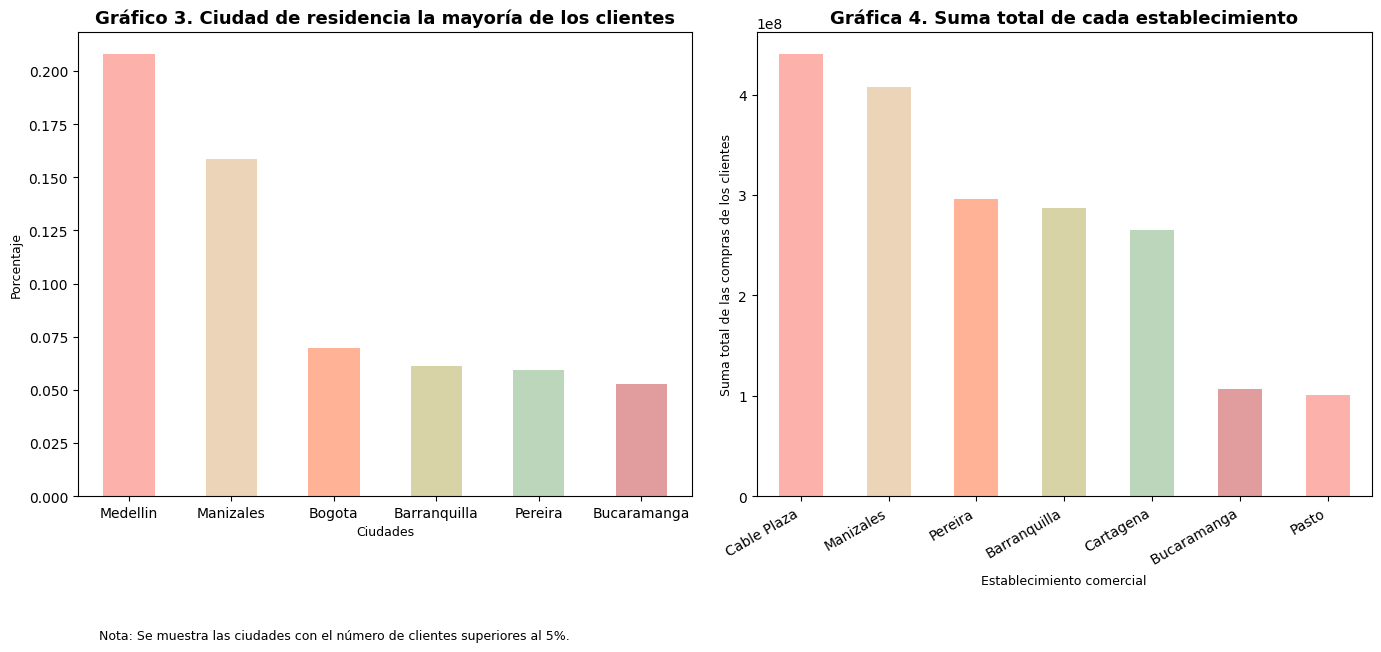

In [117]:
plt.figure(figsize=(14, 7))

# Ciudad de residencia de los clientes

plt.subplot(1,2,1)
data['Ciudad de Residencia'] = data['Ciudad de Residencia'].str.capitalize() # Se coloca la primera letra en mayúscula

ciudad_frecuencia = data['Ciudad de Residencia'].value_counts() / len(data['Ciudad de Residencia']) # Variable que cuenta los valores de la ciudad de residencia

ciudad_frecuencia = ciudad_frecuencia[ciudad_frecuencia > 0.05]  # Filtro a las ciudades que trengan más del 5% de los clientes 

ax = ciudad_frecuencia.plot(kind='bar', color= ['salmon', '#DEB887', '#FF7F50', '#BDB76B', '#8FBC8F', '#CD5C5C'], alpha = 0.6) # Gráfico de barras 

ax.set_facecolor('white') # Define el color del fondo de la gráfica

plt.title('Gráfico 3. Ciudad de residencia la mayoría de los clientes', fontsize=13, fontweight='bold') # Título

ax.set_xticklabels(ciudad_frecuencia.index, rotation=0, ha='center') # Rotación de las etiquetas del eje x

plt.xlabel('Ciudades', fontsize=9) # Etiqueta del eje x

plt.ylabel('Porcentaje', fontsize=9) # Etiqueta del eje y

plt.text(0.8, -0.3, 'Nota: Se muestra las ciudades con el número de clientes superiores al 5%.'\
        , fontsize=9, ha='right', va='center', transform=ax.transAxes) # Nota de página de la gráfica

# Monto total en cada establecimiento
plt.subplot(1,2,2)
monto_ciudad = data[['Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga', \
         'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena', \
         'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza']].sum().sort_values(ascending=False)
monto_ciudad.index = ['Cable Plaza', 'Manizales', 'Pereira', 'Barranquilla', 'Cartagena', ' Bucaramanga', 'Pasto', 'Cucuta']

monto_ciudad = monto_ciudad[monto_ciudad>0]
# Crear el gráfico de barras
monto_ciudad.plot(kind='bar', color= ['salmon', '#DEB887', '#FF7F50', '#BDB76B', '#8FBC8F', '#CD5C5C'], alpha = 0.6)

# Personalizar el gráfico
plt.title('Gráfica 4. Suma total de cada establecimiento', fontsize=13, fontweight='bold')
plt.xlabel('Establecimiento comercial', fontsize=9)
plt.ylabel('Suma total de las compras de los clientes', fontsize=9)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

In [118]:
monto_ciudad = data[['Monto - MARCA COTTON- Cartagena', 'Ciudad de Residencia']]
monto_ciudad = monto_ciudad[monto_ciudad['Monto - MARCA COTTON- Cartagena']>0]
monto_ciudad['Monto - MARCA COTTON- Cartagena'].mean()

710716.5201072386

## Segmento de clientes

<p> El 70% de nuestros clientes se autodenominan como apasionados y/o adictos a nuestros productos, lo que evidencia que estos clientes realizan compras de manera recurrente y están en una fase de lealtad hacia nuestra empresa. <p>

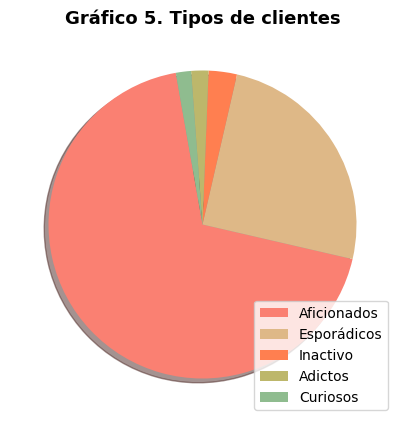

In [119]:
labels = data['Segmento'].value_counts().index
counts = data['Segmento'].value_counts().values

plt.figure(figsize = (8, 5))
plt.pie(counts,         
        colors = ['salmon','#DEB887', '#FF7F50', '#BDB76B', '#8FBC8F', '#CD5C5C'], 
         shadow=True,
        startangle=100)

plt.title("Gráfico 5. Tipos de clientes", fontsize=13, fontweight='bold')
plt.legend(labels, loc="lower right")

## Monto por compra y transacciones

<p> Se presenta una gran diferencia entre el 2019 y 2020 si se compraron en la empresa, lo cual compraron 6000 clientes para el 2019 y para el 2020 hubo una disminución del 84% en clientes que si compraron para el 2020. Pero, el número de transacciones en promedio para cada año se mantuvieron, alrededor de 99 mil y 95 mil para el 2019 y 2020, repectivamente. Lo que indica que apesar de la caida de clientes para el 2020, los poco que hicieron compras fueron por montos muy grandes<p>

Text(0, 0.5, 'Número de clientes')

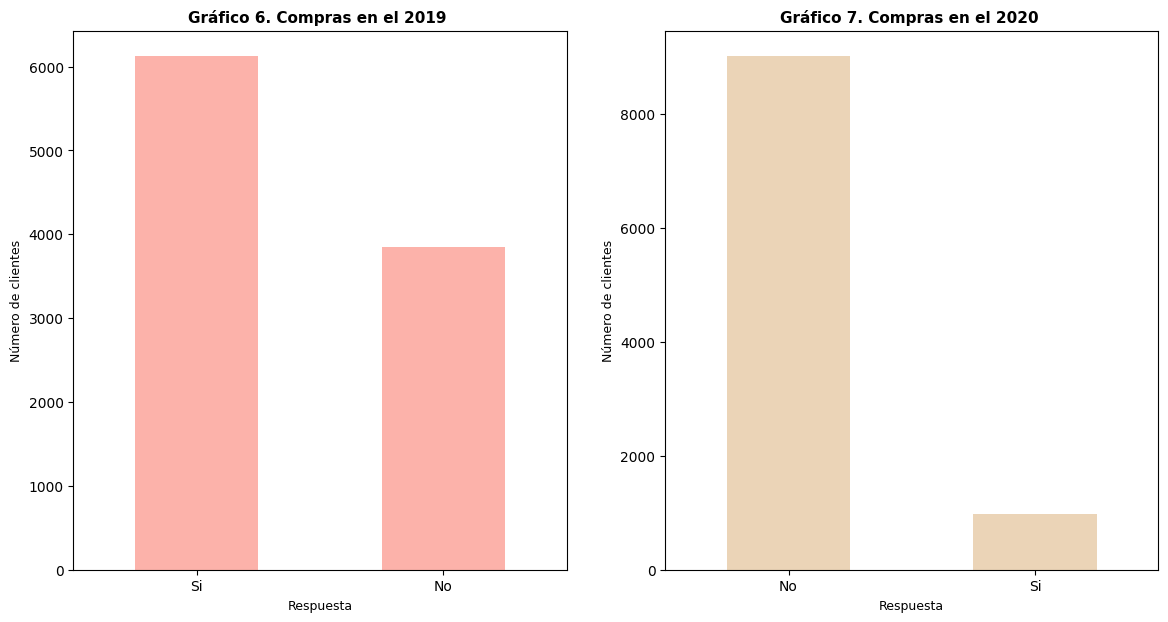

In [120]:
plt.figure(figsize=(14, 7))

# Compras del 2019
plt.subplot(1,2,1)
compra_2019 = data['Compro 2019?'].value_counts().T

ax = compra_2019.plot(kind='bar', color= ['salmon'], alpha = 0.6) # Gráfico de barras 

ax.set_facecolor('white') # Define el color del fondo de la gráfica

ax.set_xticklabels(compra_2019.index, rotation=0, ha='center', label='2019') # Rotación de las etiquetas del eje x

# Configurar las ubicaciones y etiquetas del eje x

plt.title('Gráfico 6. Compras en el 2019 ', fontsize=11, fontweight='bold') # Título

plt.xlabel('Respuesta', fontsize=9) # Etiqueta del eje x

plt.ylabel('Número de clientes', fontsize=9) # Etiqueta del eje y

# Compras del 2020
plt.subplot(1,2,2)

compra_2020 = data['Compro 2020?'].value_counts().T

ax = compra_2020.plot(kind='bar', color= ['#DEB887'], alpha = 0.6) # Gráfico de barras 

ax.set_xticklabels(compra_2020.index, rotation=0, ha='center', label='2020') # Rotación de las etiquetas del eje x

# Configurar las ubicaciones y etiquetas del eje x

plt.title('Gráfico 7. Compras en el 2020 ', fontsize=11, fontweight='bold') # Título

plt.xlabel('Respuesta', fontsize=9) # Etiqueta del eje x

plt.ylabel('Número de clientes', fontsize=9) # Etiqueta del eje y


Text(0, 0.5, 'Promedio Monto por Transacción')

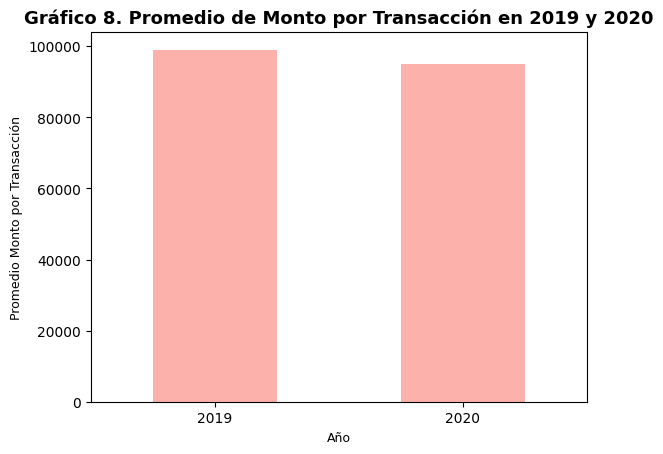

In [121]:

# TRANSACCIONES POR MONTO


transacciones_2019 = data['Monto Comprado 2019?'].sum() / data['Nro Transacciones 2019'].sum()
transacciones_2020 = data['Monto Comprado 2020'].sum() / data['Nro Transacciones 2020'].sum()

# Crear un DataFrame con estos valores
transacciones = pd.DataFrame({'Año': ['2019', '2020'],
                                  'Promedio Monto por Transacción': [transacciones_2019, transacciones_2020]})

ax = transacciones.plot(kind='bar', color='salmon', alpha=0.6, legend= False)

ax.set_xticklabels(transacciones['Año'].values, rotation=0, ha='center') 

plt.title('Gráfico 8. Promedio de Monto por Transacción en 2019 y 2020', fontsize=13, fontweight='bold')
plt.xlabel('Año', fontsize=9)
plt.ylabel('Promedio Monto por Transacción', fontsize=9)

## Recencia y monto de la última compra

<p> Los datos de la última compra y la recencia exhiben valores atípicos, como se puede apreciar en las gráficas 9 y 11. En el caso de la última compra, se observa la presencia de compras que llegan hasta los 31 millones de pesos, lo cual es notablemente superior a la media, mediana y desviación estándar, que son de 590,206, 303,700 y 957,754 pesos, respectivamente. Esta dispersión inusual sugiere una variabilidad significativa en las transacciones, con algunas excepcionalmente grandes. <p>

<p> En cuanto a la recencia, se observa que muchos de los clientes realizaron compras hace aproximadamente 15 semanas, pero se nota una marcada disminución en las compras posteriores a esa semana. Esto podría indicar un patrón de compra que varía con el tiempo, con una concentración de compras recientes seguida de una disminución en la frecuencia de compras. <p>

<p> Por otro lado, el número de artículos muestra una distribución asimétrica hacia la izquierda, donde la mayoría de las compras consisten en uno o cuatro artículos. Esto sugiere que la mayoría de los clientes tienden a adquirir una cantidad limitada de artículos en sus transacciones habituales. <p>

<p> Estas observaciones resaltan la importancia de comprender y abordar los valores atípicos en los datos, ya que pueden influir en las conclusiones y en la toma de decisiones basadas en el análisis de datos. <p>


Text(0, 0.5, 'Frecuencia')

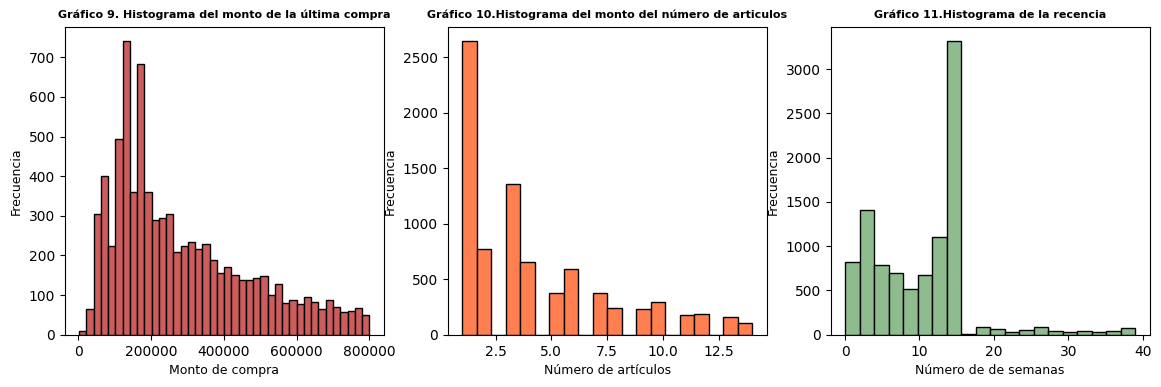

In [122]:
# MONTO TOTAL DE LA ÚLTIMA COMPRA
monto = data['Monto Total de ultima compra']

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
# Crear el histograma de los datos menores al percentil 75%
plt.hist(monto[monto < 800000], bins=40, color='#CD5C5C', edgecolor='black')

plt.title('Gráfico 9. Histograma del monto de la última compra', fontsize=8, fontweight='bold')
plt.xlabel('Monto de compra', fontsize=9)
plt.ylabel('Frecuencia', fontsize=9)

# CANTIDAD DE ARTÍCULOS

articulos = data['Cantidad Articulos']
plt.subplot(1, 3, 2)
# Crear histograma de los datos menore al percentil 75%
plt.hist(articulos[articulos < 15], bins = 20, color='#FF7F50', edgecolor='black')
plt.title('Gráfico 10.Histograma del monto del número de articulos', fontsize=8, fontweight='bold')
plt.xlabel('Número de artículos', fontsize=9)
plt.ylabel('Frecuencia', fontsize=9)

# RECENCIA
recencia = data['Recencia (Tiempo transcurrido en semanas desde su ultima compra)']
plt.subplot(1,3,3)
# Crear histograma de los datos menore al percentil 75%
plt.hist(recencia[recencia<40], bins = 20, color='#8FBC8F', edgecolor='black')
plt.title('Gráfico 11.Histograma de la recencia', fontsize=8, fontweight='bold')
plt.xlabel('Número de de semanas', fontsize=9)
plt.ylabel('Frecuencia', fontsize=9)

## Correlaciones de matrices

<p> El monto total de las compras está fuertemente relacionado positivamente con la cantidad de artículos adquiridos,  y la frecuencia de compra de los clientes, en cambio, entre menos semanas haya pasado desde la última compra mayor será el monto total. Estas variables desempeñarán un papel fundamental en la determinación y el análisis del crecimiento de la empresa. <p>

<p> Por otro lado, la frecuencia de compra de los clientes está vinculada estrechamente con la recencia de sus compras, el monto total gastado y la cantidad de artículos que adquieren en cada transacción. Estas relaciones subrayan la importancia de comprender y gestionar eficazmente estas variables para mantener y expandir la base de clientes de la empresa.<p>

In [123]:
data_cuantitativos = data_cuantitativos.drop(columns=['Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', \
                                                     'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales', \
                                                     'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena', \
                                                    'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza'])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Monto_2019'),
  Text(0, 1.5, 'nro_2019'),
  Text(0, 2.5, 'monto_2020'),
  Text(0, 3.5, 'nro_2020'),
  Text(0, 4.5, 'edad'),
  Text(0, 5.5, 'monto_total'),
  Text(0, 6.5, 'cantidad_articulos'),
  Text(0, 7.5, 'recencia'),
  Text(0, 8.5, 'frecuencia')])

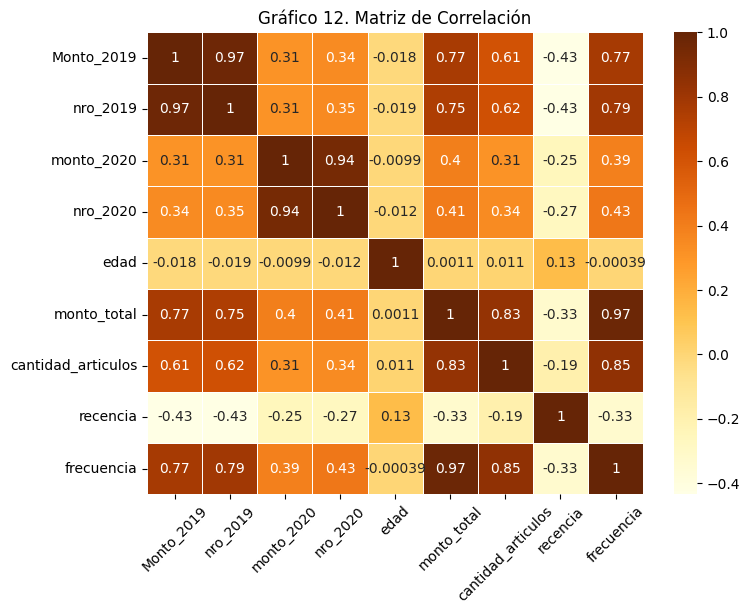

In [124]:
plt.figure(figsize=(8, 6))

correlacion = data_cuantitativos.corr()
correlacion.columns = ['Monto_2019', 'nro_2019', 'monto_2020', 'nro_2020', 'edad', 'monto_total', 'cantidad_articulos',\
                        'recencia', 'frecuencia']
correlacion.index = ['Monto_2019', 'nro_2019', 'monto_2020', 'nro_2020', 'edad', 'monto_total', 'cantidad_articulos',\
                        'recencia', 'frecuencia']

sns.heatmap(correlacion, annot=True, cmap='YlOrBr', linewidths=.5)
plt.title('Gráfico 12. Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)